<a href="https://colab.research.google.com/github/Lipinor/deep_learning_cbpf/blob/master/diabetes_filipe_melo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.layers import Dropout

from sklearn.model_selection import train_test_split

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
# save filepath to variable for easier access
diabetes_file_path = '/content/drive/My Drive/Colab Notebooks/data/diabetes.csv'
data = pd.read_csv(diabetes_file_path)
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [48]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [49]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [51]:
X = data.to_numpy()[:,0:8] 
Y = data.to_numpy()[:,8]
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = seed)
print (f'Shape of Train Data : {X_train.shape}')
print (f'Shape of Test Data : {X_test.shape}')

Shape of Train Data : (614, 8)
Shape of Test Data : (154, 8)


# Model description
The first hidden layer has 100 neurons, the second has 50, both with a dropout of 30%.

In [52]:
model = Sequential([
  Dense(100, activation='relu', input_dim = (8)),
  keras.layers.Dropout(0.3),
  Dense(50, activation='relu'),
  keras.layers.Dropout(0.3),
  Dense(1, activation='sigmoid'),
])

model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'],
)


model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               900       
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_9 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 51        
Total params: 6,001
Trainable params: 6,001
Non-trainable params: 0
_________________________________________________________________


# Model Fitting and Testing
Here we fit the model and test it in each epoch.

In [53]:
history = model.fit(
  X_train, # training data
  y_train, # training targets
  epochs=150,
  batch_size=32, 
  validation_data = (X_test, y_test), 
  verbose = 1
)

Epoch 1/150
20/20 [==============================] - 0s 14ms/step - loss: 6.7348 - accuracy: 0.4739 - val_loss: 1.1597 - val_accuracy: 0.6558
Epoch 2/150
20/20 [==============================] - 0s 5ms/step - loss: 4.4059 - accuracy: 0.5554 - val_loss: 1.1391 - val_accuracy: 0.5000
Epoch 3/150
20/20 [==============================] - 0s 5ms/step - loss: 3.4496 - accuracy: 0.5554 - val_loss: 1.5111 - val_accuracy: 0.4091
Epoch 4/150
20/20 [==============================] - 0s 5ms/step - loss: 2.4830 - accuracy: 0.5537 - val_loss: 0.8736 - val_accuracy: 0.6169
Epoch 5/150
20/20 [==============================] - 0s 6ms/step - loss: 2.1990 - accuracy: 0.5717 - val_loss: 0.7873 - val_accuracy: 0.5195
Epoch 6/150
20/20 [==============================] - 0s 7ms/step - loss: 1.8934 - accuracy: 0.5570 - val_loss: 0.6822 - val_accuracy: 0.6429
Epoch 7/150
20/20 [==============================] - 0s 5ms/step - loss: 1.6206 - accuracy: 0.5896 - val_loss: 0.6815 - val_accuracy: 0.6883
Epoch 8/150


# Model testing
This is the training and validation losses for each epoch. The proximity of both lines is a good indicator that the model is not overfitting.

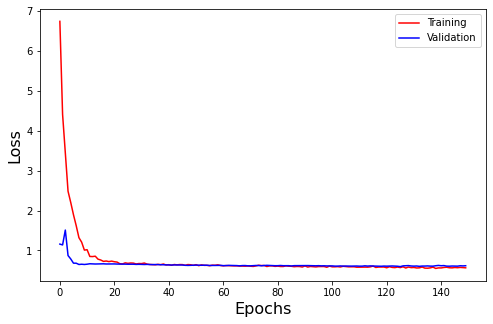

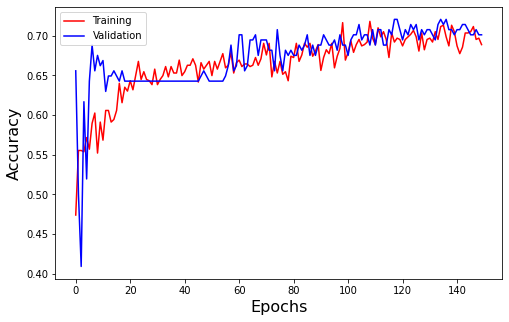

In [54]:
loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

#Epochs
epochs = range(len(val_loss))

# Plotting loss

fig1 = plt.figure(figsize=(8,5))
gs1 = fig1.add_gridspec(1, 1)
ax1 = fig1.add_subplot(gs1[0, 0])

ax1.plot(epochs, loss, 'r', label='Training')
ax1.plot(epochs, val_loss, 'b', label='Validation')
ax1.set_xlabel('Epochs', size=16)
ax1.set_ylabel('Loss', size=16)
#ax1.set_yscale('log')
ax1.legend()
plt.show()

# Plotting accuracy metric

fig2 = plt.figure(figsize=(8,5))
gs2 = fig2.add_gridspec(1, 1)
ax2 = fig2.add_subplot(gs2[0, 0])

ax2.plot(epochs, accuracy, 'r', label='Training')
ax2.plot(epochs, val_accuracy, 'b', label='Validation')
ax2.set_xlabel('Epochs', size=16)
ax2.set_ylabel('Accuracy', size=16)
#ax2.set_yscale('log')
ax2.legend()
plt.show()